Huber Loss: 

Loss : [0.02]
Gradient : [-0.2]
Epoch : 0 , Loss : 0.0951 , y_pred : 1.1065
Epoch : 50 , Loss : 0.0659 , y_pred : 1.0127
Epoch : 100 , Loss : 0.0632 , y_pred : 1.0025
Epoch : 150 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 200 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 250 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 300 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 350 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 400 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 450 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 500 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 550 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 600 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 650 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 700 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 750 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 800 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 850 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 900 , Loss : 0.0625 , y_pred : 1.0000
Epoch : 950 , Loss : 0.0625 , y_pred : 1.0000


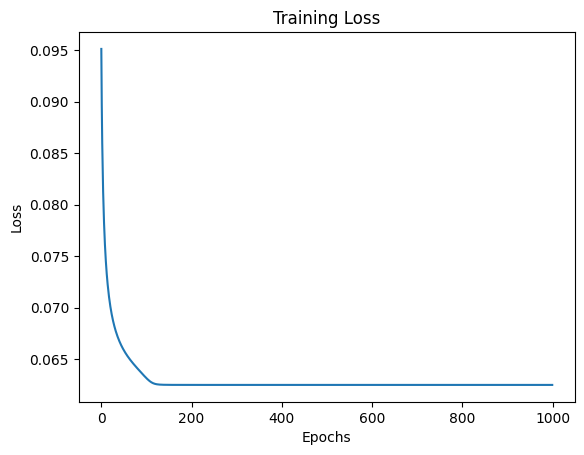

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
def sigmoid(z):
  return 1 / (1-np.exp(-np.clip(z,-250 , 250)))
def sigmoid_prime(z):
  s = sigmoid(z)
  return s * (1-s)
def huber_loss(y_true, y_pred, delta = 1.0):
  error = np.abs(y_true - y_pred)
  quadratic = 0.5 * error ** 2
  linear = delta * error - 0.5 * delta ** 2
  loss = np.where(error <= delta, quadratic, linear)
  return loss
def huber_gradient(y_true, y_pred,delta = 1.0):
  error = y_true - y_pred
  abs_err = np.abs(error)
  gradient = np.where(abs_err <= delta, -error , -delta * np.sign(error))
  return gradient

print("Huber Loss: \n")
y_t,y_p = np.array([1.0]) , np.array([0.8])
print(f"Loss : {huber_loss(y_t,y_p)}")
print(f"Gradient : {huber_gradient(y_t,y_p)}")



# Self-Bulit 3 layer NN
class Three_Layer_NN:
  def __init__(self, eta =0.5, epochs = 10000, delta_huber = 1.0):
    self.eta = eta
    self.epochs = epochs
    self.delta_huber = delta_huber
    np.random.seed(42)
  
    self.W1 = np.array([[0.15, 0.20]]) # Shape (1, 2)
    self.b1 = np.array([0.35, 0.60]) # Shape (2,)   
    self.W2 = np.array([[0.40, 0.45], [0.50, 0.55]]).T # Shape (2, 2)    
    self.b2 = np.array([0.60, 0.65]) # Shape (2,)    
    self.W3 = np.array([[0.70], [0.75]]) # Shape (2, 1)    
    self.b3 = np.array([0.80]) # Shape (1,)

  def forward(self, X):
    
    self.z1 = X @ self.W1 + self.b1 
    self.a1 = sigmoid(self.z1) # (2,2)
    self.z2 = self.a1 @ self.W2 + self.b2 
    self.a2 = sigmoid(self.z2) # (2,2)    
    self.z3 = self.a2 @ self.W3 + self.b3 
    self.a3 = sigmoid(self.z3) 
    return self.a3.flatten() # (2,)

  def backward(self, X, y):
    m = len(y)
    y_pred = self.a3.flatten()
    dL_da3 = huber_gradient(y, y_pred , self.delta_huber) # dL_da3 is (2,)
   
    self.delta3 = dL_da3.reshape(-1, 1) * sigmoid_prime(self.z3) 
    self.delta2 = (self.delta3 @ self.W3.T )* sigmoid_prime(self.z2) # self.delta2 is (2,2)    
    self.delta1 = (self.delta2 @ self.W2.T )* sigmoid_prime(self.z1) # self.delta1 is (2,2)    
    self.dW3 = self.a2.T @ self.delta3 # (2,2) @ (2,1) = (2,1). 
    
    self.db3 = np.sum(self.delta3 , axis = 0, keepdims = True) 
    self.dW2 = self.a1.T @ self.delta2     
    self.db2 = np.sum(self.delta2 , axis = 0)     
    self.dW1 = X.T @ self.delta1     
    self.db1 = np.sum(self.delta1 , axis = 0) 

  def update(self):
    self.W3 -= self.eta * self.dW3
    self.b3 -= self.eta * self.db3.flatten() 
    self.W2 -= self.eta * self.dW2
    self.b2 -= self.eta * self.db2
    self.W1 -= self.eta * self.dW1
    self.b1 -= self.eta * self.db1

  def train(self, X,y):
    losses = []
    for epoch in range(self.epochs):
      y_pred = self.forward(X)
      loss = np.mean(huber_loss(y , y_pred , self.delta_huber)) 
      losses.append(loss)
      self.backward(X,y)
      self.update()
      if epoch % 50 == 0:
        print(f"Epoch : {epoch} , Loss : {loss:.4f} , y_pred : {y_pred.mean():.4f}")
    return losses


X = np.array([[0.8], [0.4]])
y = np.array([1.0,0.5])
nn = Three_Layer_NN(eta = 0.5, epochs = 1000, delta_huber = 1.0)
losses = nn.train(X,y)

# Plotting Training Loss
plt.plot(losses)
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.title("Training Loss")
plt.show()